# GEONE - multiGaussian estimation and simulation

This notebook introduces general stuff about multiGaussian estimation and simulation in geone:
- functions for kriging and sequential Gaussian simulation (SGS) in a grid,
- unique wrapper for these functions,
- available elementary covariance models (illustrated in 1D), and example of covariance models in 1D, 2D, 3D

## Functions for kriging and SGS in a grid

### Kriging
- `geone.grf.krige<d>D`: kriging based on Fast Fourier Transform (fft) in `<d>` dimension
- `geone.geosclassicinterface.estimate`: kriging, classic with specified search neighborhood

### SGS
- `geone.grf.grf<d>D`: SGS based on Fast Fourier Transform (fft) in `<d>` dimension
- `geone.geosclassicinterface.simulate`: SGS, classic with specified search neighborhood

### Output
- `geone.grf.krige<d>D` and `geone.grf.grf<d>D` return numpy arrays
- `geone.geosclassicinterface.estimate` and `geone.geosclassicinterface.simulate` return "images" (class `geone.img.Img`)

**Notebooks of examples.** For detailed examples illustrating these functions, see the following jupyter notebooks:
- functions based on fft:
    - `ex_grf_1d.ipynb`: example for the generation of 1D fields
    - `ex_grf_2d.ipynb`: example for the generation of 2D fields
    - `ex_grf_3d.ipynb`: example for the generation of 3D fields
- functions based on classic with search neighborhood:
    - `ex_geosclassic_1d.ipynb`:example in 1D for two-point statistics simulation and estimation
    - `ex_geosclassic_1d_non_stat_cov.ipynb`:example in 1D with non-stationary covariance model
    - `ex_geosclassic_2d.ipynb`:example in 2D for two-point statistics simulation and estimation
    - `ex_geosclassic_2d_non_stat_cov.ipynb`:example in 2D with non-stationary covariance model
    - `ex_geosclassic_3d.ipynb`:example in 3D for two-point statistics simulation and estimation
    - `ex_geosclassic_3d_non_stat_cov.ipynb`:example in 3D with non-stationary covariance model

## One wrapper: function `geone.multiGaussian.multiGaussianRun`
The following keyword arguments control which function is used:

|keyword argument | |
|:--- |:---|
| `mode='simulation', algo='fft'`    | wrapper for `geone.grf.grf<d>D`|
| `mode='simulation', algo='classic'`| wrapper for `geone.geosclassicinterface.simulate`|
| `mode='estimation', algo='fft'`    | wrapper for `geone.grf.krige<d>D`|
| `mode='estimation', algo='classic'`| wrapper for `geone.geosclassicinterface.estimate`|

Note that the dimension `<d>` is automatically detected.

The keyword argument `output_mode` controls the "format" of the output:

|keyword argument | |
|:--- |:---|
| `output_mode='array'`| a numpy array is returned|
| `output_mode='img'`  | an "image" (class `geone.img.Img`) is returned|

Additional keyword arguments can be given (the relevant ones are passed).

**Note:** with `algo='classic'`, multiprocessing may be enabled, it is recommended to specify the keyword arguments controlling the computational resources (see the notebooks of examples mentioned above).

## Covariance model
The classes `geone.covModel.CovModel1D`, `geone.covModel.CovModel2D`, `geone.covModel.CovModel3D` allow to define covariance model with several elementary contributions (list of elementary models), and with anisotropies and specified orientation for 2D and 3D models (see further).

## Available elementary covariance models (1D)
An elementary model is defined by a 2-tuple, whose the first component is the type of the model given by a string and the second component is a dictionary used to pass the required parameters. The available elementary models are given in the table below for 1D case. Note that for 2D (resp. 3D) the range 'r' is a sequence of 2 (resp. 3) floats instead of a float. 

| Type                    | Parameters (dict)                                                | Covariance function $C(h)$|
|:----                    |:----------                                                       |:----------|
|'nugget'                 |  'w' (float) weight                                              | $C(h) = w \cdot \mathbf{1}\{h=0\}$|
|'spherical'              |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - 3/2 t + 1/2 t^3)$|
|'exponential'            |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t)$|
|'gaussian'               |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t^2)$|
|'triangular'             |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - t)$|
|'cubic'                  |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \mathbf{1}\{t\leqslant 1\}\cdot (1 - 7 t^2 + 35/4  t^3 - 7/2 t^5 + 3/4 t^7)$|
|'sinus_cardinal'         |  'w' (float) weight, 'r' (float) range                           | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \sin(\pi t)/(\pi t)$|
|'gamma'                  |  'w' (float) weight, 'r' (float) range, 's' (float) power        | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = 1 / (1 + \alpha t)^s$, $\alpha = 20^{1/s} - 1$|
|'power'                  |  'w' (float) weight, 'r' (float) scale, 's' (float) power        | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = 1 - t^s$|
|'exponential_generalized'|  'w' (float) weight, 'r' (float) range, 's' (float) power        | $C(h) = w \cdot f(\vert h\vert / r),\ \ f(t) = \exp(-3t^s)$|
|'matern'                 |  'w' (float) weight, 'r' (float) scale, 'nu' (float)             | $C(h) = w \cdot 1/(2^{\nu-1} \Gamma(\nu))\cdot u^\nu \cdot K_{\nu}(u),\ \ u = \sqrt(2\nu)/r \cdot \vert h\vert,\ \ \nu= nu$|

**Notes**

- $\mathbf{1}\{\textit{expression}\}$ denotes the indicator function with value 1 when the *expression* is true and 0 if it is false.
- $K_{\nu}$ is the modified Bessel function of the second kind of parameter $\nu$ (=`nu`); see below for more details about `matern` model
- the variogram function is defined as $\gamma(h) = C(0) - C(h) = w - C(h)$

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import package 'geone'
import geone as gn

In [2]:
# Choose matplotlib backend
# -------------------------
# 'inline' : inline plot (non-interactive)
# 'widget' : interactive plot
# 'tk'     : plot in a pop-up window (interactive)
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
# get_ipython().run_line_magic('matplotlib', 'widget')
# get_ipython().run_line_magic('matplotlib', 'tk')

# Or simply:
# %matplotlib inline
# %matplotlib widget
# %matplotlib tk


In [3]:
import pyvista as pv

# Choose backend for pyvista with jupyter
# ---------------------------------------
pv.set_jupyter_backend('static') # static plots
# pv.set_jupyter_backend('trame')  # 3D-interactive plots

# Notes:
# -> ignored if run in a standard python shell
# -> use keyword argument "notebook=False" in Plotter() to open figure in a pop-up window

In [4]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=13, micro=7, releaselevel='final', serial=0)
geone version: 1.3.0


### Remark
The matplotlib figures can be visualized in *interactive* mode:
- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## Models: `spherical`, `exponential`, `gaussian`, `triangular`, `cubic`

In [5]:
w = 2.0
r = 10.0
cov_model_sph = gn.covModel.CovModel1D(elem=[('spherical',   {'w':w, 'r':10})], name='sph')
cov_model_exp = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':10})], name='exp')
cov_model_gau = gn.covModel.CovModel1D(elem=[('gaussian',    {'w':w, 'r':10})], name='gau')
cov_model_tri = gn.covModel.CovModel1D(elem=[('triangular',  {'w':w, 'r':10})], name='tri')
cov_model_cub = gn.covModel.CovModel1D(elem=[('cubic',       {'w':w, 'r':10})], name='cub')

cov_model_list = [cov_model_sph, cov_model_exp, cov_model_gau, cov_model_tri, cov_model_cub]

In [6]:
# Print sill and range
for cov_model in cov_model_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model sph: sill = 2.0, range = 10
Cov. model exp: sill = 2.0, range = 10
Cov. model gau: sill = 2.0, range = 10
Cov. model tri: sill = 2.0, range = 10
Cov. model cub: sill = 2.0, range = 10


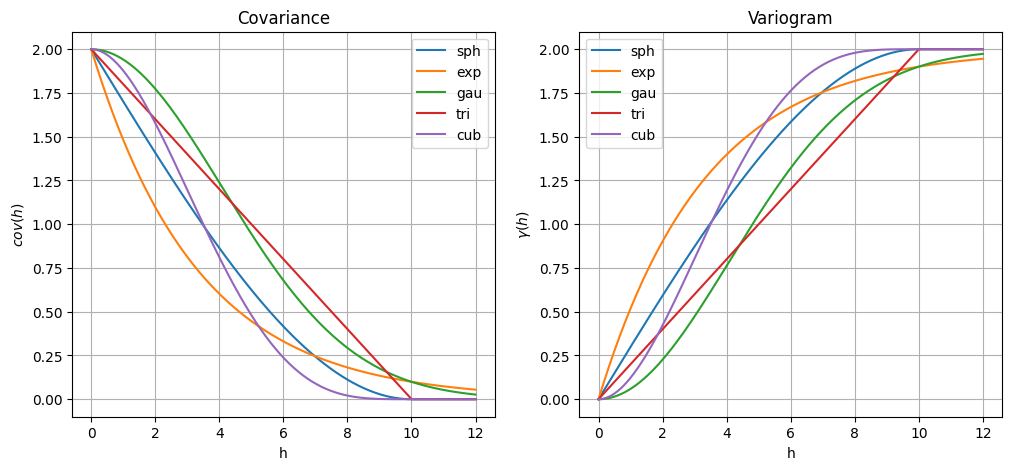

In [7]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_list:
    cov_model.plot_model(label=cov_model.name)
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `sinus_cardinal`

In [8]:
cov_model_sinc = gn.covModel.CovModel1D(elem=[('sinus_cardinal', {'w':w, 'r':10})], name='sinc')

In [9]:
# Print sill and range
cov_model = cov_model_sinc
print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model sinc: sill = 2.0, range = 10


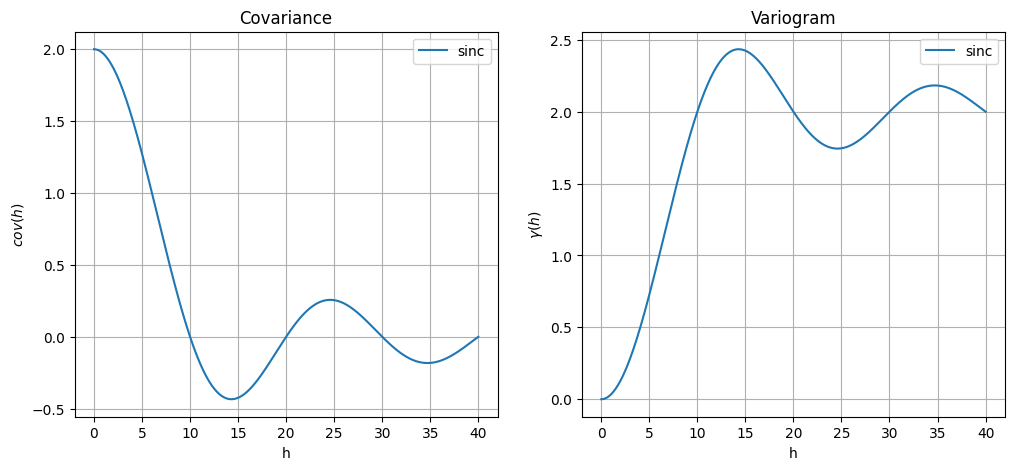

In [10]:
# Plot covariance and variogram
cov_model = cov_model_sinc

plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
cov_model.plot_model(label=cov_model.name, hmax=4.0*cov_model.r())
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
cov_model.plot_model(vario=True, label=cov_model.name, hmax=4.0*cov_model.r())
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `gamma`

In [11]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_gamma_list = [
    gn.covModel.CovModel1D(elem=[('gamma', {'w':w, 'r':10, 's':s})], name=f'gamma s={s}')
    for s in s_list]

In [12]:
# Print sill and range
for cov_model in cov_model_gamma_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model gamma s=0.2: sill = 2.0, range = 10
Cov. model gamma s=0.5: sill = 2.0, range = 10
Cov. model gamma s=1.0: sill = 2.0, range = 10
Cov. model gamma s=2.0: sill = 2.0, range = 10
Cov. model gamma s=3.0: sill = 2.0, range = 10
Cov. model gamma s=5.0: sill = 2.0, range = 10
Cov. model gamma s=10.0: sill = 2.0, range = 10


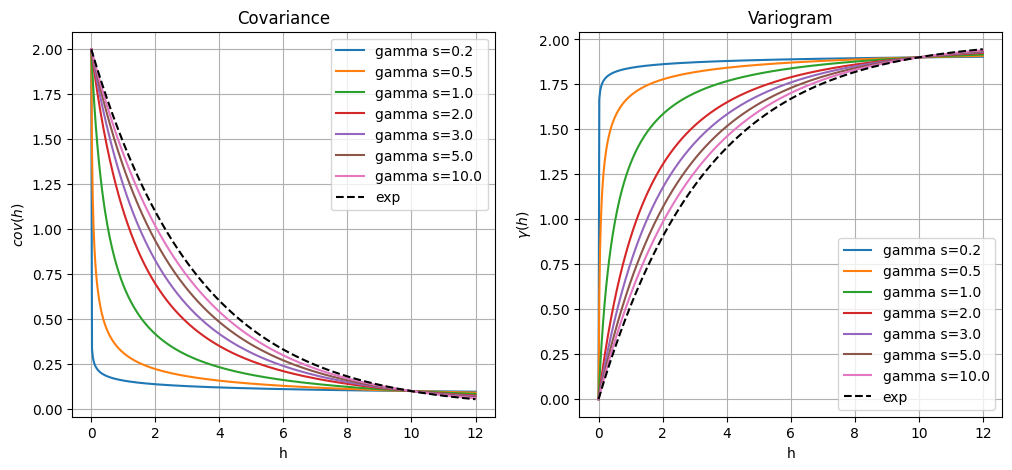

In [13]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_gamma_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_gamma_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `power`

**Warning: this is not a stationary model (does not reach a plateau / sill).**

In [14]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
cov_model_pow_list = [
    gn.covModel.CovModel1D(elem=[('power', {'w':w, 'r':10, 's':s})], name=f'pow s={s}')
    for s in s_list]

In [15]:
# Print sill and range
for cov_model in cov_model_pow_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model pow s=0.2: sill = 2.0, range = 10
Cov. model pow s=0.5: sill = 2.0, range = 10
Cov. model pow s=1.0: sill = 2.0, range = 10
Cov. model pow s=2.0: sill = 2.0, range = 10
Cov. model pow s=3.0: sill = 2.0, range = 10
Cov. model pow s=5.0: sill = 2.0, range = 10


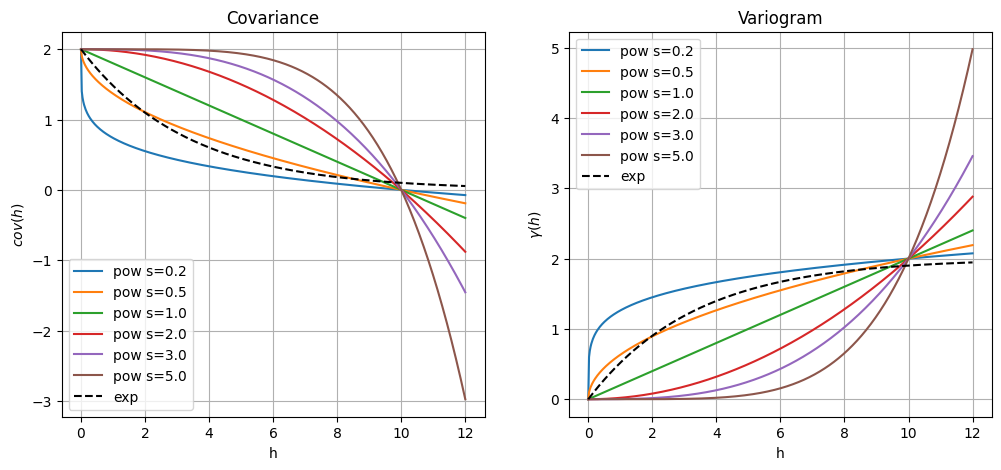

In [16]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_pow_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_pow_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `exponential_generalized`

In [17]:
w = 2.0
r = 10.0
s_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_exp_gen_list = [
    gn.covModel.CovModel1D(elem=[('exponential_generalized', {'w':w, 'r':10, 's':s})], name=f'exp gen s={s}')
    for s in s_list]

In [18]:
# Print sill and range
for cov_model in cov_model_exp_gen_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model exp gen s=0.2: sill = 2.0, range = 10
Cov. model exp gen s=0.5: sill = 2.0, range = 10
Cov. model exp gen s=1.0: sill = 2.0, range = 10
Cov. model exp gen s=2.0: sill = 2.0, range = 10
Cov. model exp gen s=3.0: sill = 2.0, range = 10
Cov. model exp gen s=5.0: sill = 2.0, range = 10
Cov. model exp gen s=10.0: sill = 2.0, range = 10


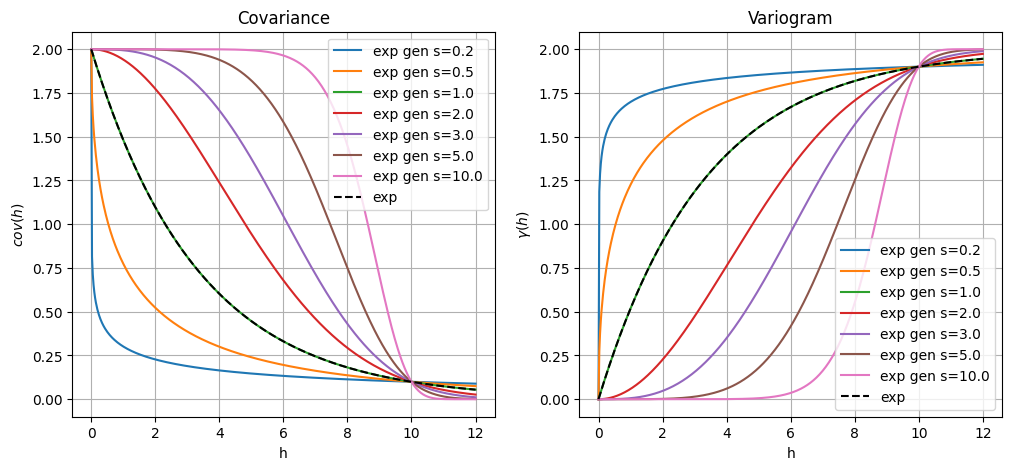

In [19]:
# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_exp_gen_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_exp.plot_model(label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_exp_gen_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_exp.plot_model(vario=True, label=cov_model_exp.name, ls='dashed', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Model: `matern`

**Warning: the range is not equal to the parameter `r`, which is a "scale" parameter.**

- Covariance `matern` with parameters `w`, `r`, and `nu=0.5` is covariance `exponential` with parameters `w`, `3r`.
- Covariance `matern` with parameters `w`, `r`, and `nu` tends to covariance 'gaussian' with parameters `w`, $\sqrt{6}$ `r`, when `nu` tends to infinity.

In [20]:
w = 2.0
r = 10.0
nu_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
cov_model_matern_list = [
    gn.covModel.CovModel1D(elem=[('matern', {'w':w, 'r':10, 'nu':nu})], name=f'matern nu={nu}, r={r}')
    for nu in nu_list]

In [21]:
# Print sill and range (cov_model.r() gives the range)
for cov_model in cov_model_matern_list:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model matern nu=0.2, r=10.0: sill = 2.0, range = 31.63139161186625
Cov. model matern nu=0.5, r=10.0: sill = 2.0, range = 29.957322735539908
Cov. model matern nu=1.0, r=10.0: sill = 2.0, range = 28.27382241179835
Cov. model matern nu=2.0, r=10.0: sill = 2.0, range = 26.841876278504646
Cov. model matern nu=3.0, r=10.0: sill = 2.0, range = 26.19786003151972
Cov. model matern nu=5.0, r=10.0: sill = 2.0, range = 25.590039613951095
Cov. model matern nu=10.0, r=10.0: sill = 2.0, range = 25.065105293108747


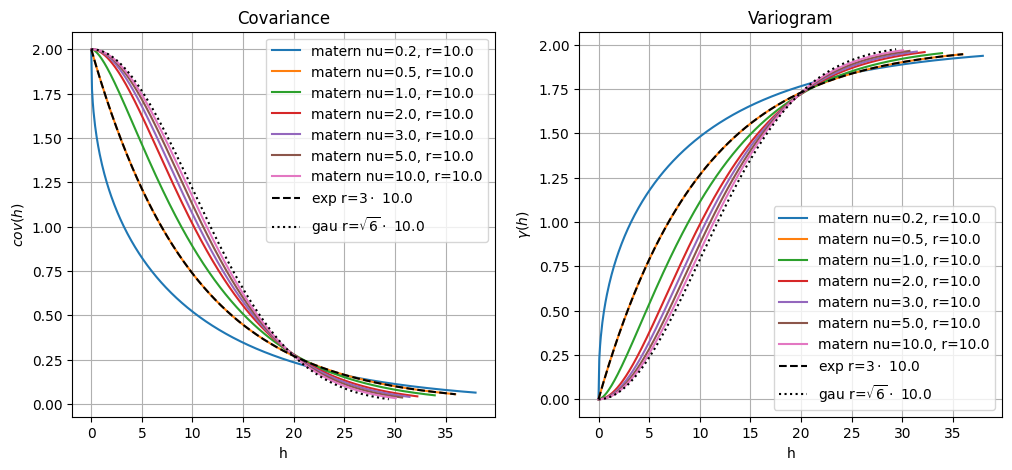

In [22]:
cov_model_expA = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':3*r})], 
                                        name=r'exp r=$3\cdot$' + f' {r}')
cov_model_gauA = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':np.sqrt(6)*r})], 
                                        name=r'gau r=$\sqrt{6}\cdot$' + f' {r}')

# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_matern_list:
    cov_model.plot_model(label=cov_model.name)
cov_model_expA.plot_model(label=cov_model_expA.name, ls='dashed', color='black')
cov_model_gauA.plot_model(label=cov_model_gauA.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_matern_list:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_expA.plot_model(vario=True, label=cov_model_expA.name, ls='dashed', color='black')
cov_model_gauA.plot_model(vario=True, label=cov_model_gauA.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

### Parameters `r`, `nu` and "effective" range
The function `geone.covModel.cov_matern_get_r_param(nu, r_eff)` computes the parameter `r` (scale) such that the 1D-`matern` covariance model of parameters `r` and `nu` has an effective range of `r_eff` (approximately).

The function `geone.covModel.cov_matern_get_effective_range(nu, r)` computes the effective range `r_eff` of a 1D-`matern` covariance model of parameter `r` (scale) and `nu`.

In [23]:
r_eff = 10.0
nu_list = [0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
r_list = [gn.covModel.cov_matern_get_r_param(nu, r_eff) for nu in nu_list]
for nu, r in zip(nu_list, r_list):
    print(f'nu={nu}, r={r}')

nu=0.2, r=3.1614163937854056
nu=0.5, r=3.3380820069533197
nu=1.0, r=3.5368404930729085
nu=2.0, r=3.725521977764187
nu=3.0, r=3.817105667397543
nu=5.0, r=3.907770425860613
nu=10.0, r=3.9896102103147046


/home/julien/miniconda3/envs/py313/lib/python3.13/site-packages/geone/covModel.py:380: RuntimeWarning: invalid value encountered in scalar power
  u1 = (0.5*u)**nu


In [24]:
cov_model_matern_list2 = [
    gn.covModel.CovModel1D(elem=[('matern', {'w':w, 'r':r, 'nu':nu})], name=f'matern nu={nu}, r={r:4.3f}')
    for nu, r in zip(nu_list, r_list)]

In [25]:
# Print sill and range (cov_model.r() gives the range)
for cov_model in cov_model_matern_list2:
    print(f'Cov. model {cov_model.name}: sill = {cov_model.sill()}, range = {cov_model.r()}')

Cov. model matern nu=0.2, r=3.161: sill = 2.0, range = 10.00000000000001
Cov. model matern nu=0.5, r=3.338: sill = 2.0, range = 9.999999999999938
Cov. model matern nu=1.0, r=3.537: sill = 2.0, range = 10.000000000000073
Cov. model matern nu=2.0, r=3.726: sill = 2.0, range = 10.000000000000002
Cov. model matern nu=3.0, r=3.817: sill = 2.0, range = 10.000000000000151
Cov. model matern nu=5.0, r=3.908: sill = 2.0, range = 9.999999999999964
Cov. model matern nu=10.0, r=3.990: sill = 2.0, range = 9.99999999999998


In [26]:
# Check
a = []
for cov_model in cov_model_matern_list2:
    nu, r = cov_model.elem[0][1]['nu'], cov_model.elem[0][1]['r']
    a.append(cov_model.r() == gn.covModel.cov_matern_get_effective_range(nu, r))

print(np.all(a)) # should be True

True


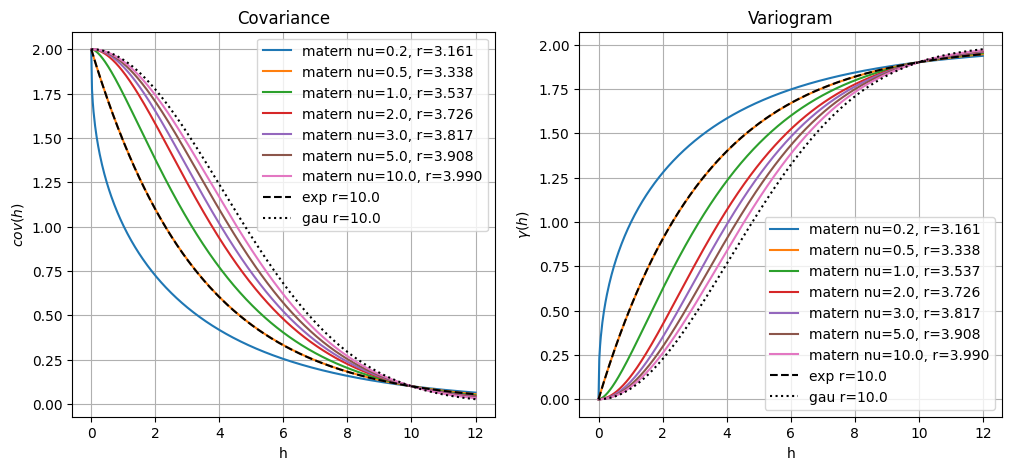

In [27]:
cov_model_expB = gn.covModel.CovModel1D(elem=[('exponential', {'w':w, 'r':r_eff})], name=f'exp r={r_eff}')
cov_model_gauB = gn.covModel.CovModel1D(elem=[('gaussian', {'w':w, 'r':r_eff})], name=f'gau r={r_eff}')

# Plot covariance and variogram
plt.subplots(1,2, figsize=(12,5))

plt.subplot(1,2,1)
# plot covariance
for cov_model in cov_model_matern_list2:
    cov_model.plot_model(label=cov_model.name)
cov_model_expB.plot_model(label=cov_model_expB.name, ls='dashed', color='black')
cov_model_gauB.plot_model(label=cov_model_gauB.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Covariance')

plt.subplot(1,2,2)
# plot variogram
for cov_model in cov_model_matern_list2:
    cov_model.plot_model(vario=True, label=cov_model.name)
cov_model_expB.plot_model(vario=True, label=cov_model_expB.name, ls='dashed', color='black')
cov_model_gauB.plot_model(vario=True, label=cov_model_gauB.name, ls='dotted', color='black')
plt.legend()
plt.grid(True)
plt.title('Variogram')
plt.show()

## Defining a covariance model in 1D: class `geone.covModel.covModel1D`

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string (`nugget`, `spherical`, `exponential`, `gaussian`, ...) and the second component is a dictionary used to pass the required parameters (the weight (`w`), the range (`r`), ...).

### Example

In [28]:
cov_model = gn.covModel.CovModel1D(elem=[
    ('gaussian', {'w':3.0, 'r':100}), # elementary contribution
    ('nugget', {'w':.5})              # elementary contribution
    ], name='model-1D example')

print(cov_model)

*** CovModel1D object ***
name = 'model-1D example'
number of elementary contribution(s): 2
elementary contribution 0
    type: gaussian
    parameters:
        w = 3.0
        r = 100
elementary contribution 1
    type: nugget
    parameters:
        w = 0.5
*****


### Plot the covariance / variogram function of the model

*Note:* plotting is not available for non-stationary covariance model.

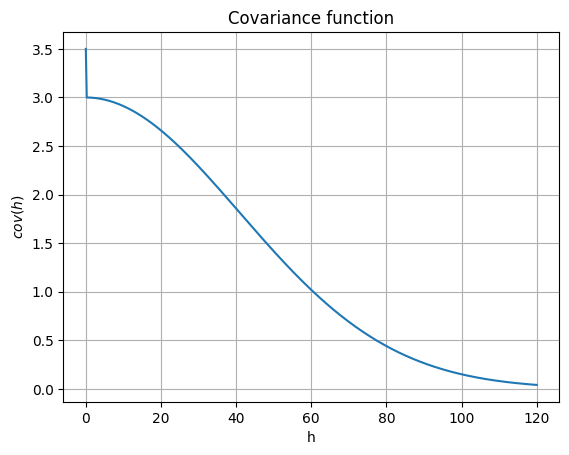

In [29]:
plt.figure()
cov_model.plot_model()
plt.title('Covariance function')
plt.show()

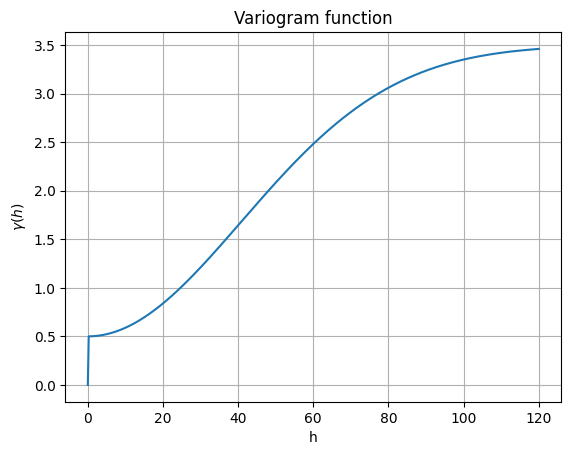

In [30]:
plt.figure()
cov_model.plot_model(vario=True)
plt.title('Variogram function')
plt.show()

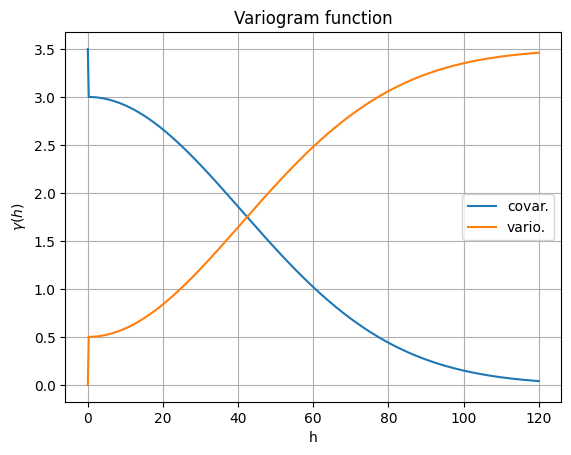

In [31]:
plt.figure()
cov_model.plot_model(label='covar.')
cov_model.plot_model(vario=True, label='vario.')
plt.legend()
plt.title('Variogram function')
plt.show()

### Get the sill and range

In [32]:
w = cov_model.sill()
r = cov_model.r()
print(f'Sill = {w}')
print(f'Range = {r}')

Sill = 3.5
Range = 100


## Defining a covariance model in 2D: class `geone.covModel.covModel2D`

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string (`nugget`, `spherical`, `exponential`, `gaussian`, ...) and the second component is a dictionary used to pass the required parameters (the weight (`w`), the range (`r`), ...).

An azimuth angle, `alpha`, can be specified in degrees: the coordinates system Ox'y' supporting the axes of the model (ranges) is obtained from the original coordinates system Oxy by applying a rotation of `-alpha` (i.e. clockwise for positive angle).

In [33]:
cov_model = gn.covModel.CovModel2D(elem=[
    ('spherical', {'w':5., 'r':[150, 40]}), # elementary contribution
    ('nugget', {'w':.5})                    # elementary contribution
    ], alpha=-30, name='model-2D example')

print(cov_model)

*** CovModel2D object ***
name = 'model-2D example'
number of elementary contribution(s): 2
elementary contribution 0
    type: spherical
    parameters:
        w = 5.0
        r = [150, 40]
elementary contribution 1
    type: nugget
    parameters:
        w = 0.5
angle: alpha = -30 deg.
    i.e.: the system Ox'y', supporting the axes of the model (ranges),
    is obtained from the system Oxy by applying a rotation of angle -alpha.
*****


### Plot the covariance / variogram function of the model

Plot the covariance function by using the method `plot_model` of the class. The following keyword arguments controls what is plotted:
- `plot_map`: `True` (default) or `False` indicating if the 2D-map is plotted
- `plot_curves`: `True` (default) or `False` indicating if curves of the function along axes x' and y' are plotted

If both are `plot_map` and `plot_curves` are set to `True` a new 1x2 figure is created (the size of the figure can be set with the keyword arguments `figsize` (tuple of 2 ints) and the keyword argument `show_suptitle` (`True` (default) or `False`) indicates if characteristics of the model is displayed as sup-title).

If only one of `plot_map` and `plot_curves` is set to `True`, the plot is done in the current figure axis.

*Note:* plotting is not available for non-stationary covariance model.

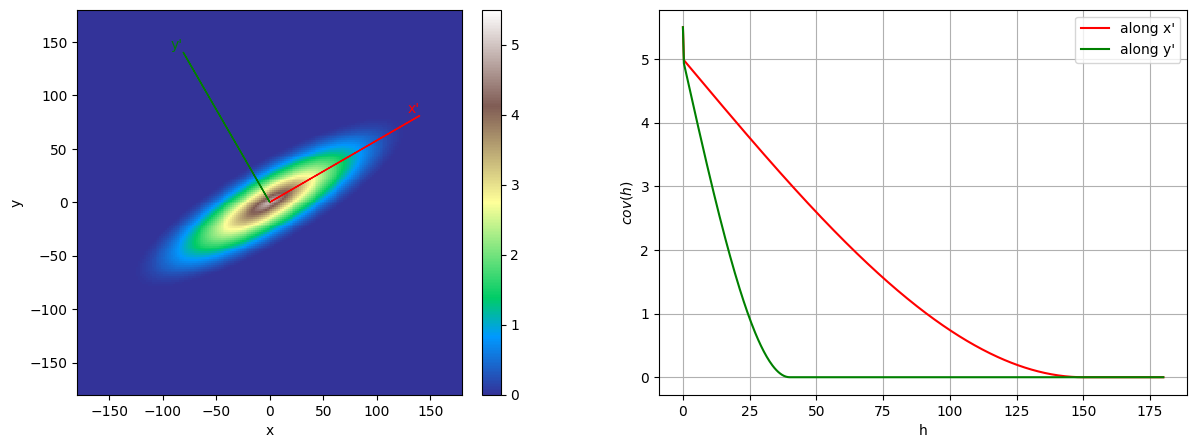

In [34]:
cov_model.plot_model(figsize=(15,5))
plt.suptitle('')
plt.show()

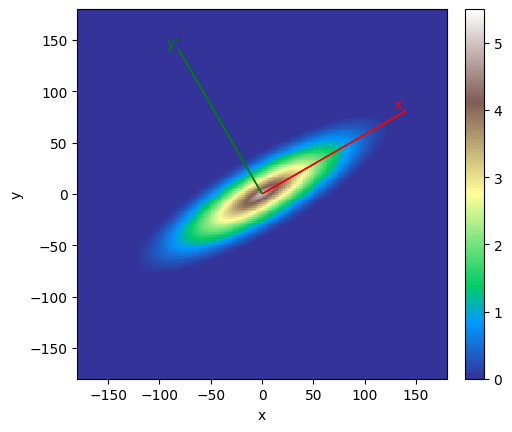

In [35]:
plt.figure()
cov_model.plot_model(plot_map=True, plot_curves=False)
plt.show()

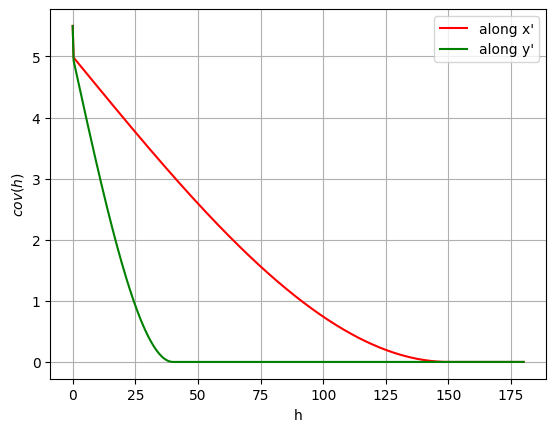

In [36]:
plt.figure()
cov_model.plot_model(plot_map=False, plot_curves=True)
plt.show()

Plot the variogram function. Same as above, but passing the keyword argument `vario=True` to the method `plot_model`.

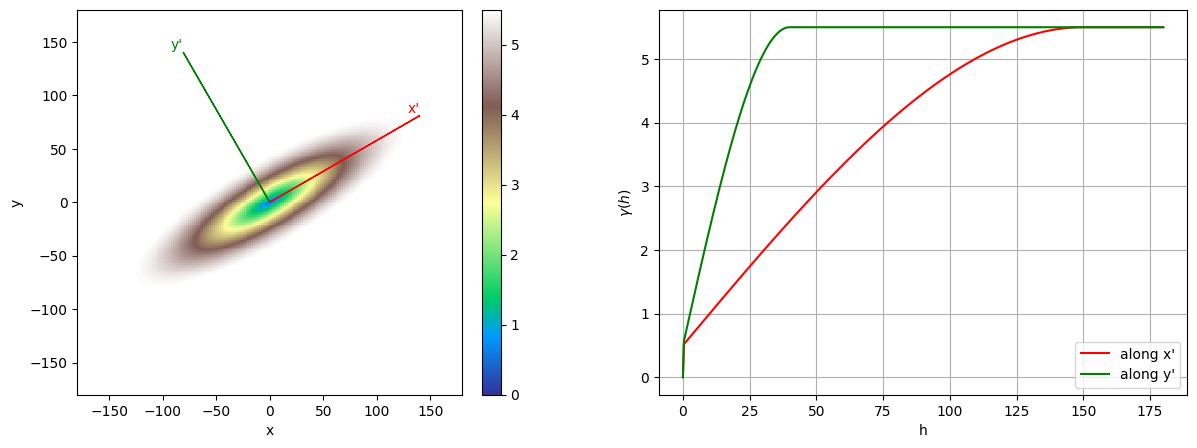

In [37]:
cov_model.plot_model(vario=True, figsize=(15,5))
plt.suptitle('')
plt.show()

The main axes x' and y' can be plotted using the method `plot_mrot`.

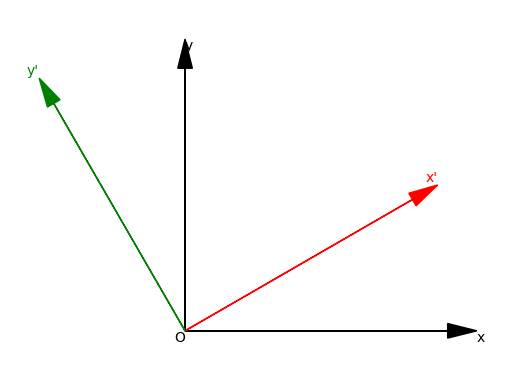

In [38]:
plt.figure()
cov_model.plot_mrot()
plt.show()

Note that the colors used for the main axes (x' and y') can be changed in the figures above by passing the keyword arguments `color0` (axis x') and  `color1` (axis y').

### Get the sill and ranges

Get the sill and the range along each axis in the coordinates system supporting the axes of the model.

In [39]:
w = cov_model.sill() # scalar
r = cov_model.r12()  # vector (1d-array) of length 2: ranges along x', y'
print(f"Sill = {w}")
print(f"Range along x' = {r[0]}, along y' = {r[1]}")

Sill = 5.5
Range along x' = 150.0, along y' = 40.0


Get the maximal range along each axis of the original system Oxy.

In [40]:
rxy = cov_model.rxy()  # vector (1d-array) of length 2: "max ranges" along x, y
print(f"Max. range along x = {rxy[0]}, along y = {rxy[1]}")

Max. range along x = 129.9038105676658, along y = 74.99999999999999


## Defining a covariance model in 3D: class `geone.covModel.covModel3D`

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string (`nugget`, `spherical`, `exponential`, `gaussian`, ...) and the second component is a dictionary used to pass the required parameters (the weight (`w`), the range (`r`), ...).

Azimuth (`alpha`), dip (`beta`) and plunge (`gamma`) angles can be specified in degrees: the coordinates system Ox'''y''''z''', supporting the axes of the model (ranges), is obtained from the original coordinates system Oxyz as follows:

- Oxyz       -> rotation of angle -alpha around Oz   -> Ox'y'z'
- Ox'y'z'    -> rotation of angle -beta  around Ox'  -> Ox''y''z''
- Ox''y''z'' -> rotation of angle -gamma around Oy'' -> Ox'''y'''z'''

In [41]:
cov_model = gn.covModel.CovModel3D(elem=[
    ('gaussian', {'w':8.5, 'r':[40, 20, 10]}), # elementary contribution
    ('nugget', {'w':0.5})                      # elementary contribution
    ], alpha=-30, beta=-40, gamma=20, name='model-3D example')

In [42]:
cov_model

*** CovModel3D object ***
name = 'model-3D example'
number of elementary contribution(s): 2
elementary contribution 0
    type: gaussian
    parameters:
        w = 8.5
        r = [40, 20, 10]
elementary contribution 1
    type: nugget
    parameters:
        w = 0.5
angles: alpha = -30, beta = -40, gamma = 20 (in degrees)
    i.e.: the system Ox'''y''''z''', supporting the axes of the model (ranges),
    is obtained from the system Oxyz as follows:
        Oxyz      -- rotation of angle -alpha around Oz  --> Ox'y'z'
        Ox'y'z'   -- rotation of angle -beta  around Ox' --> Ox''y''z''
        Ox''y''z''-- rotation of angle -gamma around Oy''--> Ox'''y'''z'''
*****

### Plot the covariance / variogram function of the model

Plot the covariance function by using the method `plot_model3d_volume` of the class for a 3D volume representation (based on `pyvista` module). The main axes are shown in red (x'''), green (y''') and blue (z''''), or in custom colors passing the keyword arguments `color0` (x'''),  `color1` (y'''), and `color2` (z''').

*Note:* plotting is not available for non-stationary covariance model.

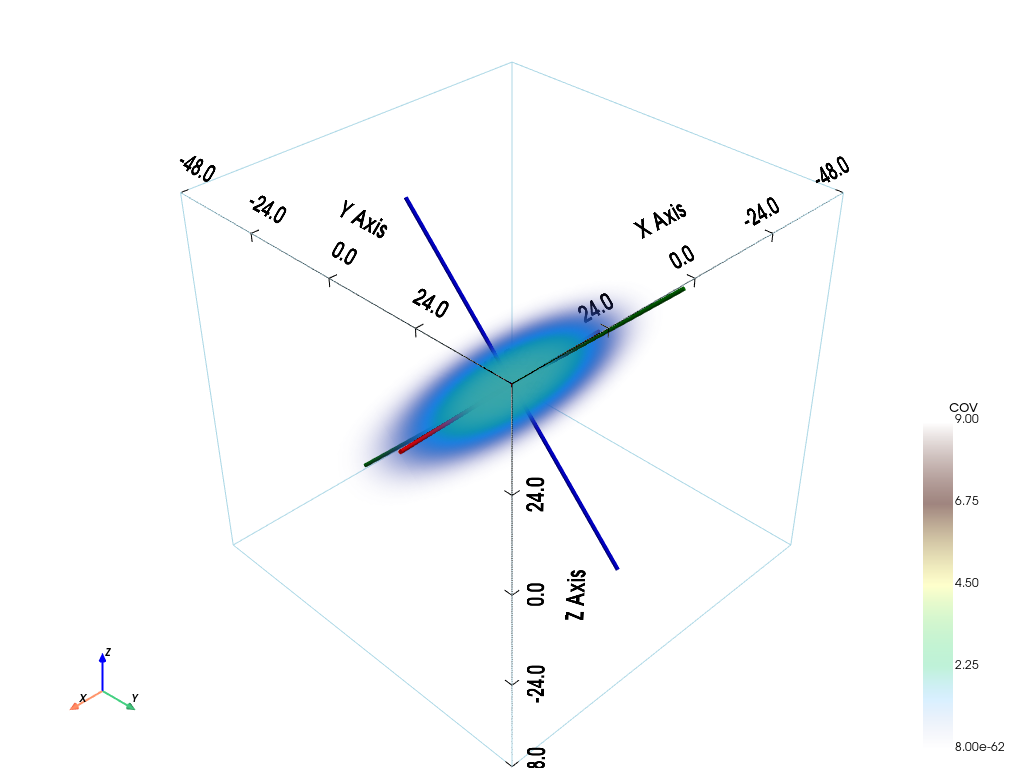

In [43]:
cov_model.plot_model3d_volume()

For a view in an intaractive figure (pop-up window):

In [44]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

pp = pv.Plotter(notebook=False) # open a plotter and specifying 'notebook=False'
cov_model.plot_model3d_volume(plotter=pp)
pp.show() # after closing the pop-up window, the position of the camera is retrieved in output.

The method `plot_model3d_slice` of the class gives a 3D representations with slices orthogonal to the main axes and going through the origin (by default). 

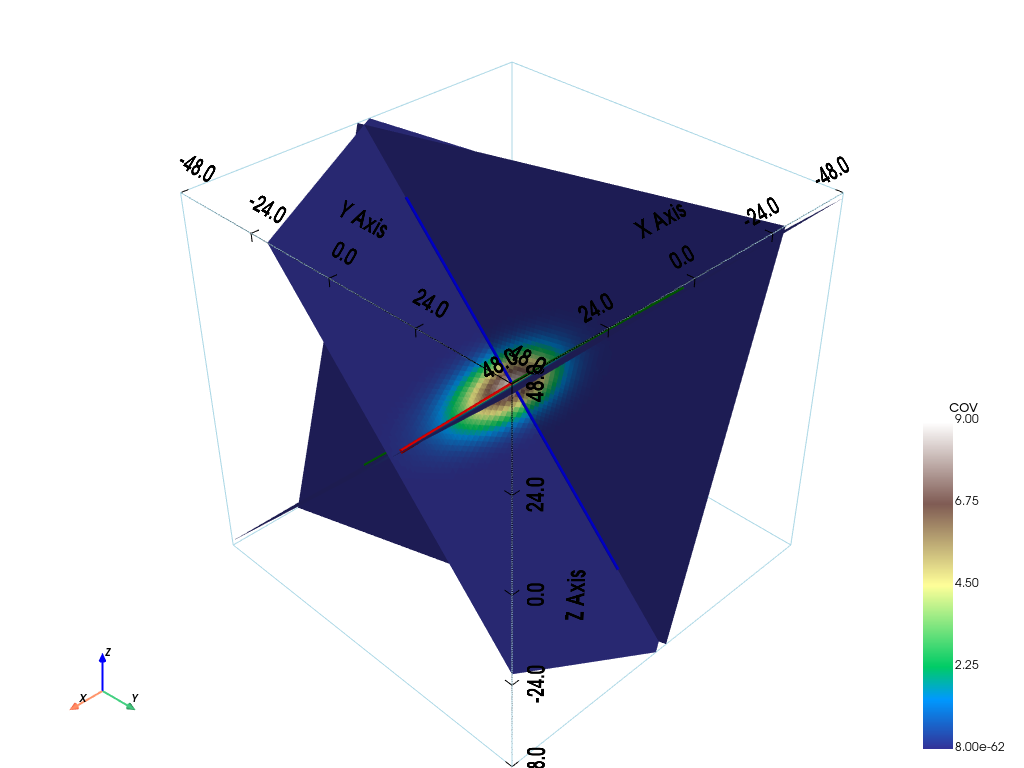

In [45]:
cov_model.plot_model3d_slice()

In [46]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Interactive figure
pp = pv.Plotter(notebook=False) # open a plotter and specifying 'notebook=False'
cov_model.plot_model3d_slice(plotter=pp)
pp.show() # after closing the pop-up window, the position of the camera is retrieved in output.

For plotting slices orthogonal to each axis of the system Oxyz:

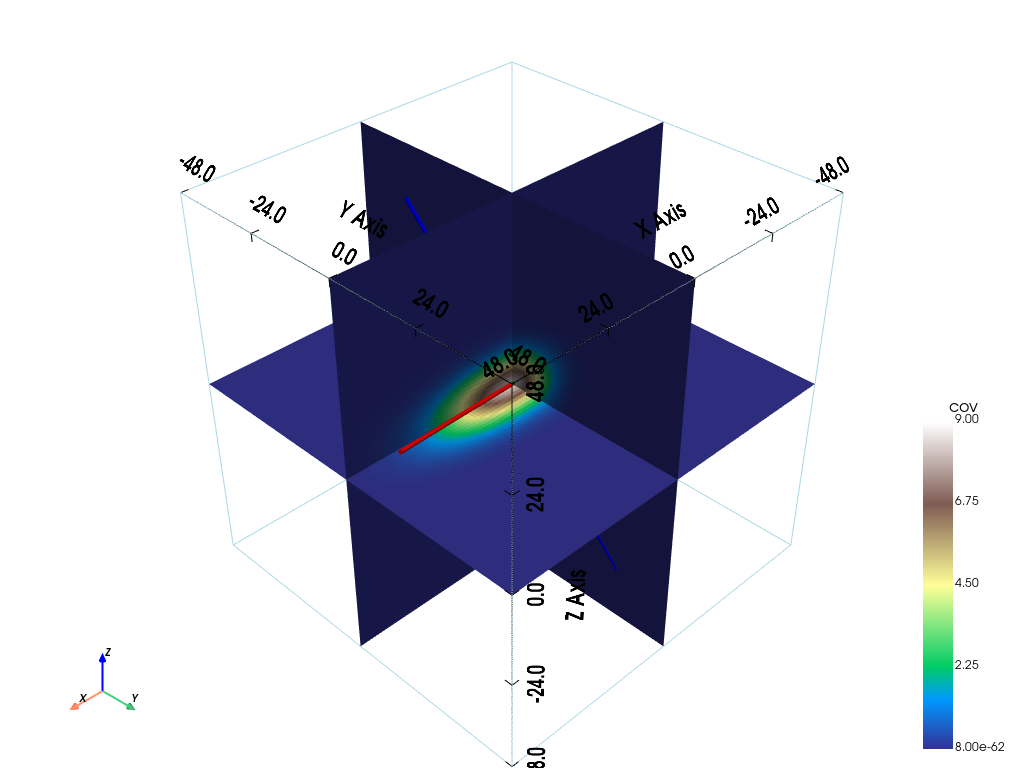

In [47]:
cov_model.plot_model3d_slice(slice_normal_x=0, slice_normal_y=0, slice_normal_z=0, slice_normal_custom=None)

In [48]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Interactive figure
pp = pv.Plotter(notebook=False) # open a plotter and specifying 'notebook=False'
cov_model.plot_model3d_slice(plotter=pp, 
                             slice_normal_x=0, slice_normal_y=0, slice_normal_z=0, slice_normal_custom=None)
pp.show() # after closing the pop-up window, the position of the camera is retrieved in output.

Plot the covariance function by using the method `plot_model_curves` of the class for plotting the function along each main axis (x''', y''', and z'''). Again, the default colors can be changed by passing the keyword arguments `color0`,  `color1`, and `color2`.

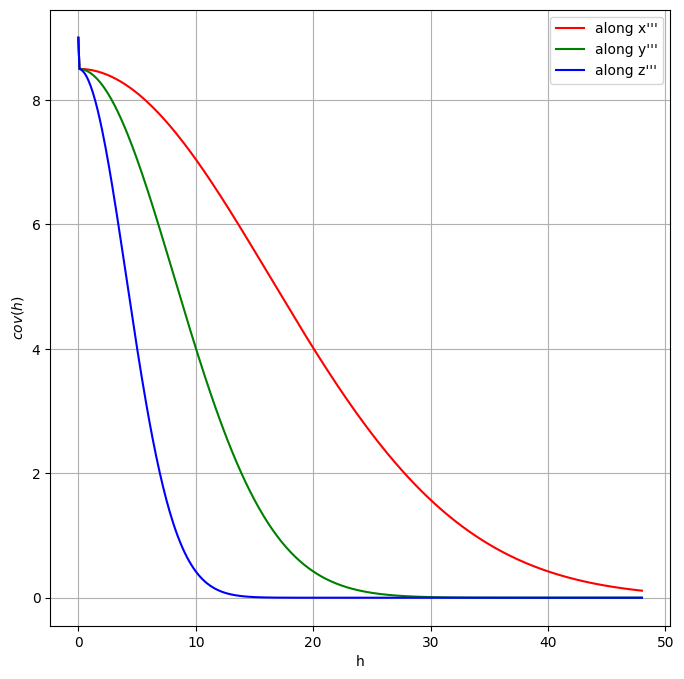

In [49]:
plt.figure(figsize=(8,8))
cov_model.plot_model_curves()
plt.show()

Plotting the variogram function: as above, but passing the keyword argument `vario=True` to the method `plot_model3d_volume` or `plot_model3d_sclice` or `plot_model_curves`.

The main axes (x''', y''' and z''') can be plotted using the method `plot_mrot`. Again, the default colors can be changed by passing the keyword arguments `color0`,  `color1`, and `color2`.

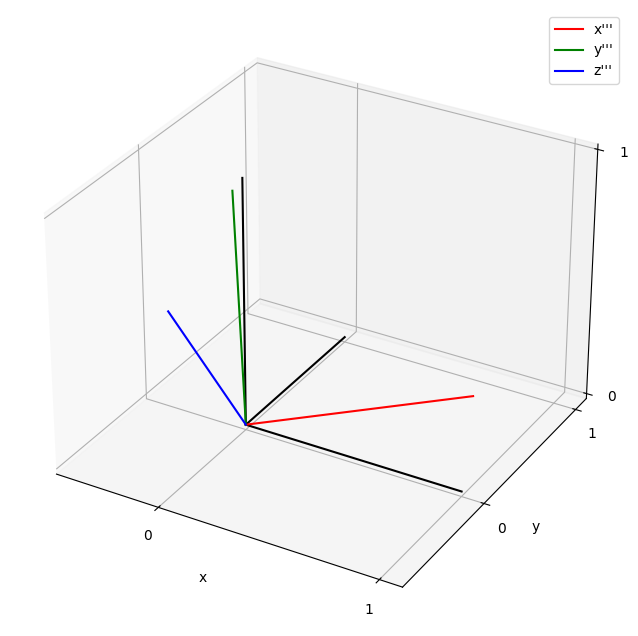

In [50]:
cov_model.plot_mrot(figsize=(8,8))

### Get the sill and ranges

Get the sill and the range along each axis in the coordinates system supporting the axes of the model.

In [51]:
w = cov_model.sill() # scalar
r = cov_model.r123() # vector (1d-array) of length 3 ranges along x'''', y''', z'''
print("Sill = {}".format(w))
print("Range along x''' = {}, along y''' = {}, along z''' = {}".format(r[0], r[1], r[2]))

Sill = 9.0
Range along x''' = 40.0, along y''' = 20.0, along z''' = 10.0


Get the maximal range along each axis of the original system Oxyz.

In [52]:
rxyz = cov_model.rxyz()  # vector (1d-array) of length 2: "max ranges" along x, y, z
print("Max. range along x = {}, along y = {}, along z = {}".format(rxyz[0], rxyz[1], rxyz[2]))

Max. range along x = 36.948833461834035, along y = 13.268278963378767, along z = 12.855752193730785
